Trabajo Práctico 3

In [4]:
# LIBRERIAS
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [40]:
# FUNCIONES

def neighborhoodFunction(distance, sigma):
    return np.exp(-distance**2 / sigma)

def initializeWeights(shape, scale=0.1):
    return np.random.uniform(-scale, scale, shape)

# Formas uniformes
def uniformCircleInit(N, radius=1, center=(0., 0.)):
    print(radius)
    r = np.sqrt(np.random.uniform(0, radius, N))
    print(r)
    phi = np.random.uniform(0, 2 * np.pi, N)
    return np.array([r * np.cos(phi), r * np.sin(phi)]).T + center
def uniformRingInit(N, innerRadius=0.5, outerRadius=1.0, center=(0., 0.)):
    r = np.sqrt(np.random.uniform(innerRadius**2, outerRadius**2, N))
    phi = np.random.uniform(0, 2 * np.pi, N)
    return np.array([r * np.cos(phi), r * np.sin(phi)]).T + center
def uniformTriangleInit(N, side_length=1, center=(0., 0.)):
    points = []
    for _ in range(N):
        while True:
            u, v = np.random.uniform(0, 1, 2)
            if u + v <= 1:
                x = u * side_length + (v * side_length) / 2
                y = v * (side_length * np.sqrt(3) / 2)
                points.append([x, y])
                break
    points = np.array(points)
    # Translate points to the center
    points[:, 0] -= side_length / 2
    points[:, 1] -= (side_length * np.sqrt(3) / 6)
    return points + np.array(center)


def computeEuclideanDistances(gridShape, winner):
    distances = np.zeros(gridShape)
    for i in range(gridShape[0]):
        for j in range(gridShape[1]):
            distances[i, j] = np.linalg.norm(np.array([i, j]) - np.array(winner))
    return distances

def updateWeights(neighborhoodFunction, W, winnerIndexes, x, distances, eta=1, sigma=1):
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W[i, j] += eta * neighborhoodFunction(distances[i, j], sigma) * (x - W[i, j])
    return W

def plotSynapticConnections(ax, W):
    gridHeight, gridWidth, _ = W.shape
    for i in range(gridHeight):
        for j in range(gridWidth):
            if i < gridHeight - 1:
                ax.plot([W[i, j, 0], W[i + 1, j, 0]], [W[i, j, 1], W[i + 1, j, 1]], color='k', linewidth=0.3)
            if j < gridWidth - 1:
                ax.plot([W[i, j, 0], W[i, j + 1, 0]], [W[i, j, 1], W[i, j + 1, 1]], color='k', linewidth=0.3)

def updateGraph(W, X, plotParameters, parametersInfo, shape, save=False):
    fig, ax, boundaries, xLim, yLim, title = plotParameters
    inputSize, networkShape, eta, sigma, iterations, it = parametersInfo
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.grid(True)
    plotSynapticConnections(ax, W)
    ax.scatter(X[:, 0], X[:, 1], color='b', label='Datos de Entrada', s=70)
    ax.scatter(W[:, :, 0].flatten(), W[:, :, 1].flatten(), color='r', label='Pesos Sinápticos', marker='s', s=30, alpha=0.65)
    for boundary in boundaries:
        x, y, lineFmt, lineWidth, labelB = boundary
        ax.plot(x, y, lineFmt, linewidth=lineWidth, label=labelB)
    ax.text(0.7, 0.1, f' \n \
            > Datos de entrada: {inputSize}\n \
            > Tamaño de red: ({networkShape[0]}, {networkShape[1]})\n \
            > $\eta$ actual: {eta:.2f}\n \
            > $\sigma$ actual = {sigma:.2f}\n \
            > Iteración: {it}/{iterations}', color='k', size=12, transform=ax.transAxes)
    ax.set_title(title, fontsize=14)
    ax.set_xlim(xLim)
    ax.set_ylim(yLim)
    ax.legend(loc='upper right')
    ax.set_aspect('equal')
    plt.show()
    if save:
        fig.savefig(f'kohonen_training_{shape}_{it}.png')
    plt.pause(0.1)

def kohonenTrain(W, X, gridShape, distancesFunction, neighborhoodFunction, plotParameters, eta=2, etaDecay=0.995, sigma=10, sigmaDecay=0.993, iterationsAmount=1000, shape='default'):
    #etaInitial = eta
    #sigmaInitial = sigma
    intervals = [0.1, 0.25, 0.5, 0.75, 1.0]
    for it in tqdm(range(iterationsAmount)):
        np.random.shuffle(X)
        for x in X:
            winnerIndexes = np.unravel_index(np.argmin(np.linalg.norm(W - x, axis=-1)), W.shape[:2])
            distances = distancesFunction(gridShape, winnerIndexes)
            W = updateWeights(neighborhoodFunction, W, winnerIndexes, x, distances, eta, sigma)
        if plotParameters is not None and (it + 1) / iterationsAmount in intervals:
            parametersInfo = (len(X), W.shape, eta, sigma, iterationsAmount, it + 1)
            updateGraph(W, X, plotParameters, parametersInfo, shape, save=True)
        sigma *= sigmaDecay
        eta *= etaDecay
    return W

def initialPlot(W, X, plotParameters):
    parametersInfo = (len(X), W.shape, 2, 10, 1000, 0)
    updateGraph(W, X, plotParameters, parametersInfo, save=True)


<>:75: SyntaxWarning: invalid escape sequence '\e'
<>:75: SyntaxWarning: invalid escape sequence '\s'
<>:75: SyntaxWarning: invalid escape sequence '\e'
<>:75: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Lucas\AppData\Local\Temp\ipykernel_35140\1761470400.py:75: SyntaxWarning: invalid escape sequence '\e'
  > Iteración: {it}/{iterations}', color='k', size=12, transform=ax.transAxes)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_35140\1761470400.py:75: SyntaxWarning: invalid escape sequence '\s'
  > Iteración: {it}/{iterations}', color='k', size=12, transform=ax.transAxes)


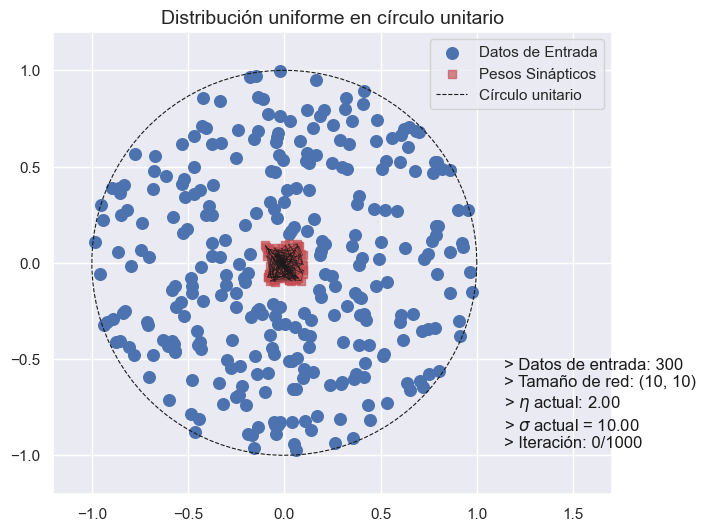

 10%|▉         | 99/1000 [00:19<03:13,  4.65it/s]

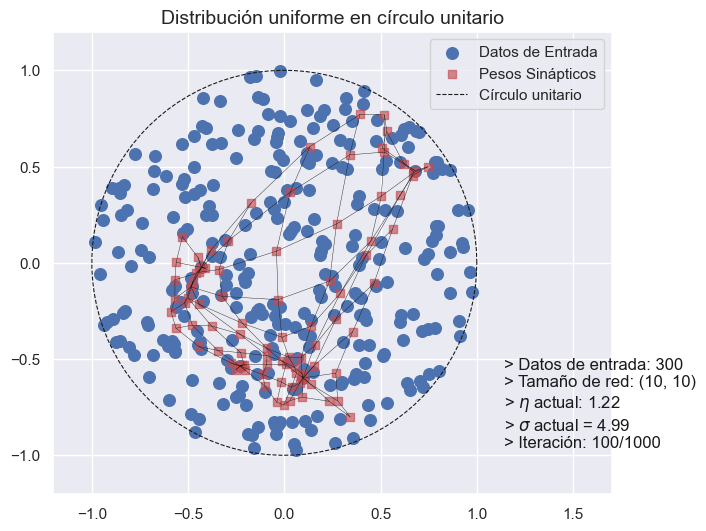

 25%|██▍       | 249/1000 [00:50<02:22,  5.28it/s]

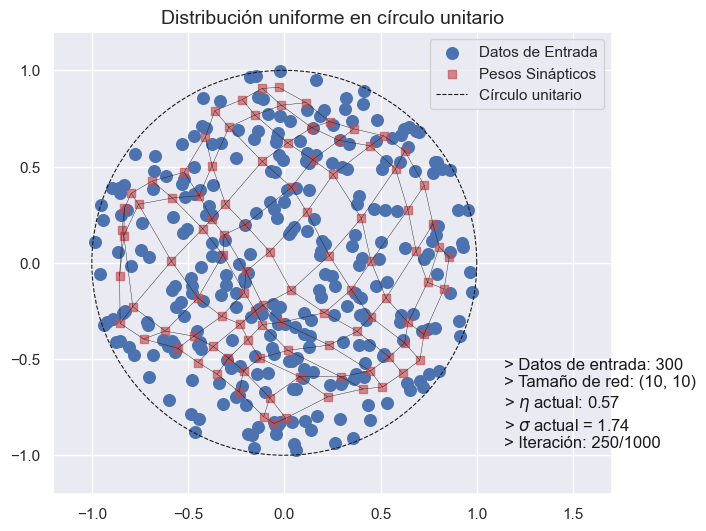

 50%|████▉     | 499/1000 [01:38<01:22,  6.09it/s]

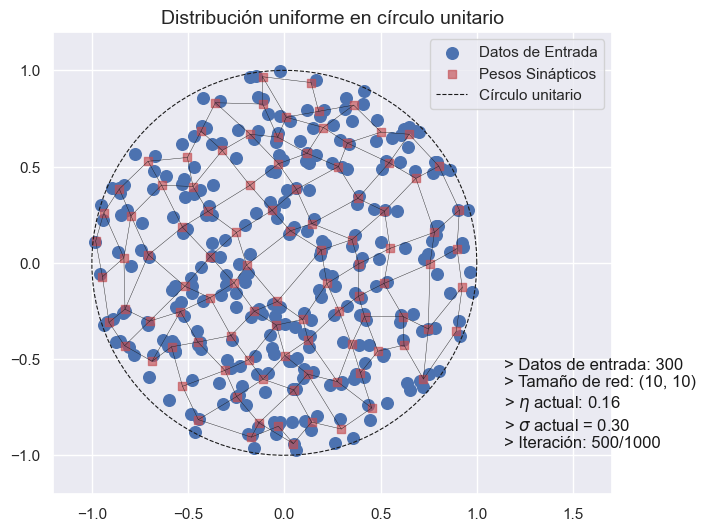

 75%|███████▍  | 749/1000 [02:24<00:43,  5.78it/s]

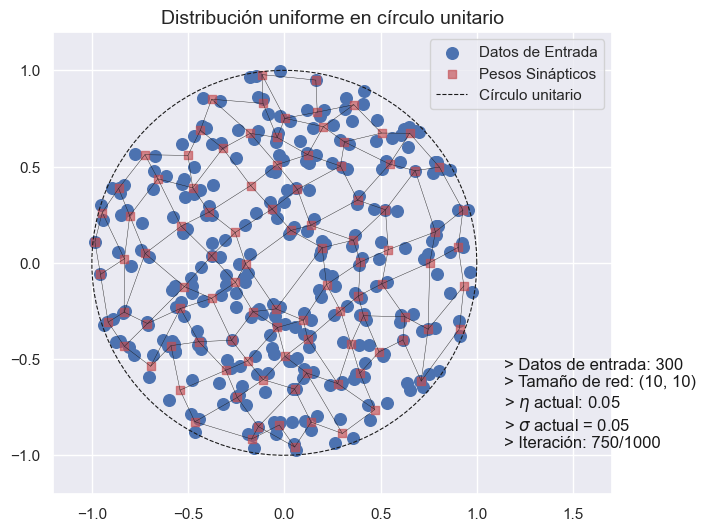

100%|█████████▉| 999/1000 [03:15<00:00,  5.73it/s]

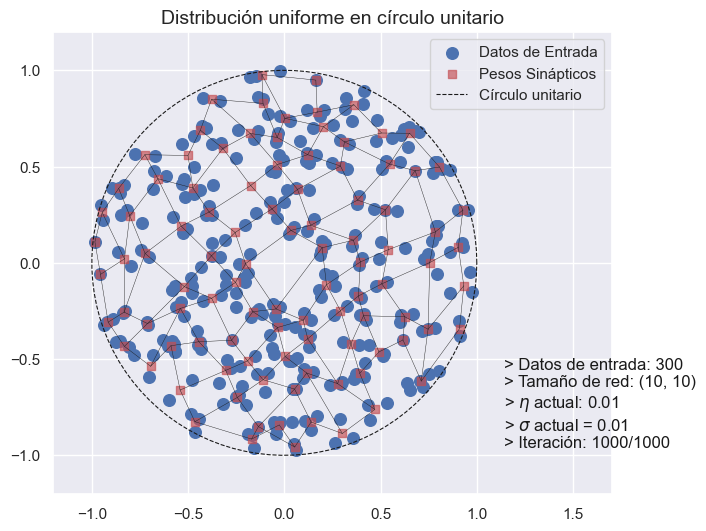

100%|██████████| 1000/1000 [03:16<00:00,  5.10it/s]


In [21]:
# Meta-parameters
gridShape = (10, 10)
inputSize = 2
etaInitial = 2
etaDecay = 0.995
sigmaInitial = 10
sigmaDecay = 0.993
iterations = 1000

# Generate input data and initial weights
center = (0, 0)
radius = 1
X = uniformCircleInit(gridShape[0] * gridShape[1] * 3, radius=radius, center=center)
W = initializeWeights((gridShape[0], gridShape[1], inputSize), scale=0.1)

# Plot parameters
xLim = np.array([-1.2, 1.7]) * radius + center
yLim = np.array([-1.2, 1.2]) * radius + center

# Boundary
circValues = np.linspace(0, 2 * np.pi, 100)
lineFmts = '--k'
lineWidths = 0.8
labels = 'Círculo unitario'
boundary = [(radius * np.cos(circValues), radius * np.sin(circValues), lineFmts, lineWidths, labels)]

title = 'Distribución uniforme en círculo unitario'
plotParameters = (None, None, boundary, xLim, yLim, title)

# Plot initial state
#initialPlot(W, X, plotParameters)
parametersInfo = (len(X), W.shape, etaInitial, sigmaInitial, iterations, 0)
updateGraph(W, X, plotParameters, parametersInfo, 'circle', save=True)

# Train the network
W = kohonenTrain(W, X, gridShape, computeEuclideanDistances, neighborhoodFunction, plotParameters, eta=etaInitial, etaDecay=etaDecay, sigma=sigmaInitial, sigmaDecay=sigmaDecay, iterationsAmount=iterations, shape='circle')


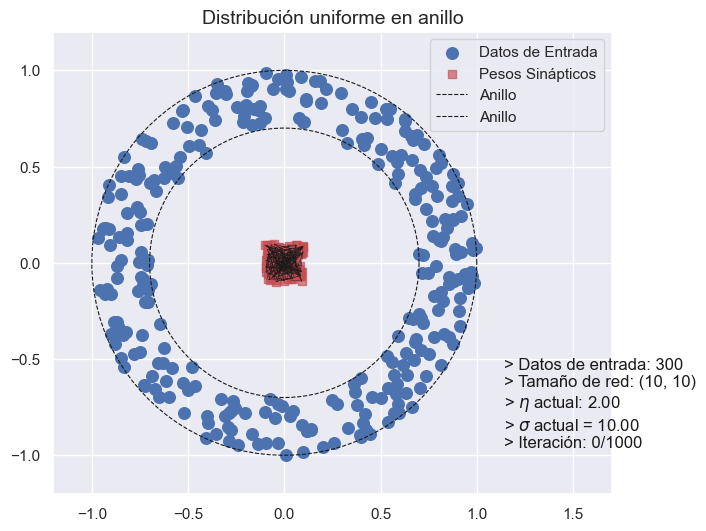

 10%|▉         | 199/2000 [00:36<04:55,  6.09it/s]

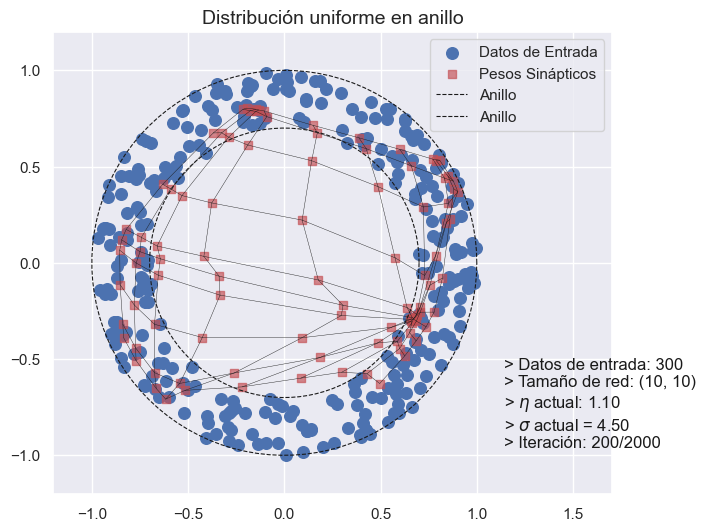

 25%|██▍       | 499/2000 [01:30<04:18,  5.80it/s]

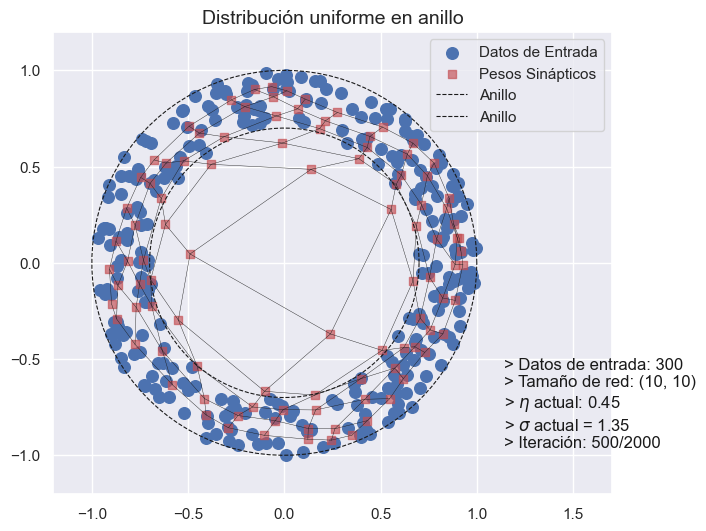

 50%|████▉     | 999/2000 [03:11<04:15,  3.93it/s]

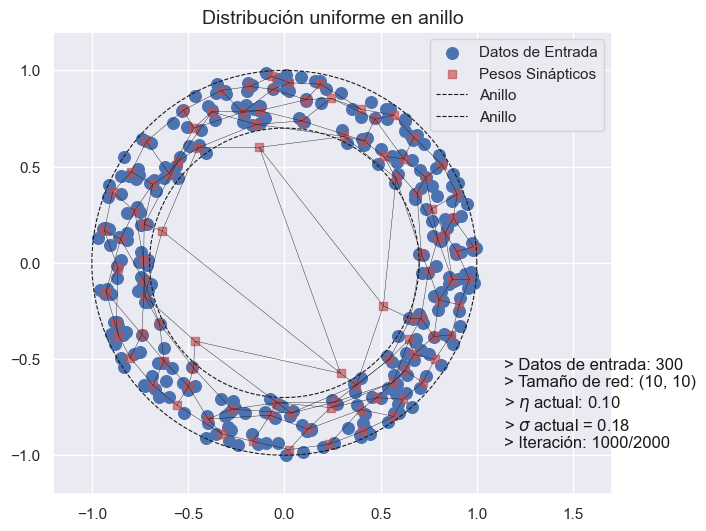

 75%|███████▍  | 1499/2000 [04:49<01:37,  5.15it/s]

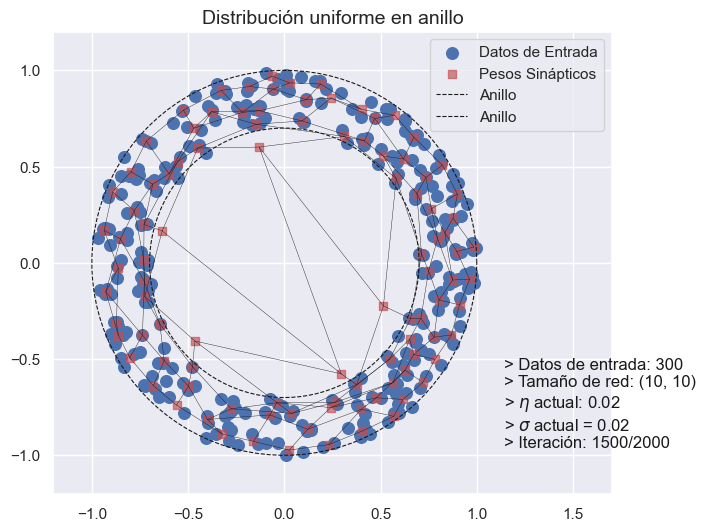

100%|█████████▉| 1999/2000 [06:23<00:00,  5.70it/s]

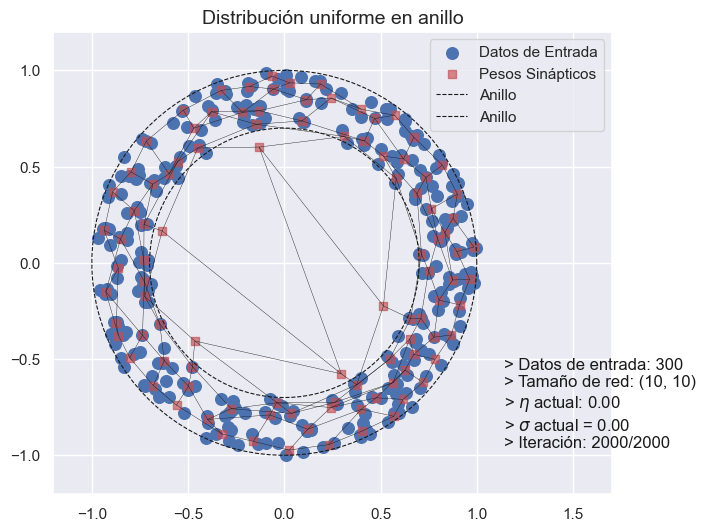

100%|██████████| 2000/2000 [06:23<00:00,  5.21it/s]


In [34]:
# Generate input data and initial weights for ring distribution
center = (0, 0)
innerRadius = 0.7
outerRadius = 1.0
X_ring = uniformRingInit(gridShape[0] * gridShape[1] * 3, innerRadius=innerRadius, outerRadius=outerRadius, center=center)
W_ring = initializeWeights((gridShape[0], gridShape[1], inputSize), scale=0.1)

# Plot parameters for ring distribution
xLim_ring = np.array([-1.2, 1.7]) * outerRadius + center
yLim_ring = np.array([-1.2, 1.2]) * outerRadius + center

# Boundary for ring distribution
ringValues = np.linspace(0, 2 * np.pi, 100)
lineFmts = '--k'
lineWidths = 0.8
labels_ring = 'Anillo'
boundary_ring = [(innerRadius * np.cos(ringValues), innerRadius * np.sin(ringValues), lineFmts, lineWidths, labels_ring),
                 (outerRadius * np.cos(ringValues), outerRadius * np.sin(ringValues), lineFmts, lineWidths, labels_ring)]

title_ring = 'Distribución uniforme en anillo'
plotParameters_ring = (None, None, boundary_ring, xLim_ring, yLim_ring, title_ring)

# Plot initial state for ring distribution
parametersInfo_ring = (len(X_ring), W_ring.shape, etaInitial, sigmaInitial, iterations, 0)
updateGraph(W_ring, X_ring, plotParameters_ring, parametersInfo_ring, 'ring', save=True)

# Train the network for ring distribution
W_ring = kohonenTrain(W_ring, X_ring, gridShape, computeEuclideanDistances, neighborhoodFunction, plotParameters_ring, eta=etaInitial, etaDecay=0.997, sigma=sigmaInitial, sigmaDecay=0.996, iterationsAmount=2000, shape='ring')

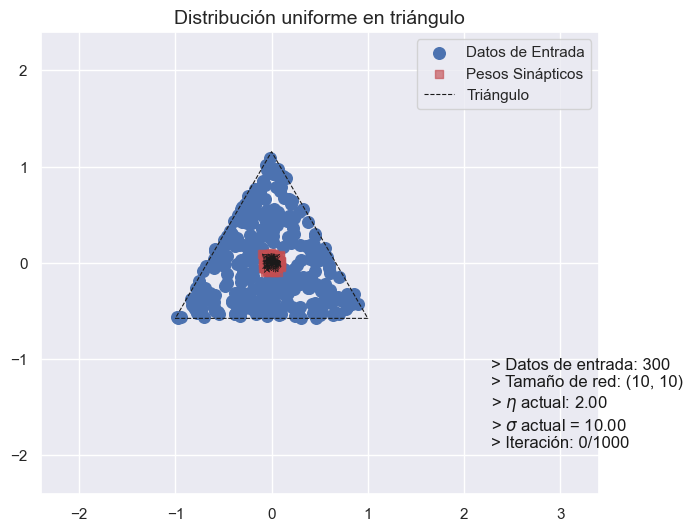

 10%|▉         | 99/1000 [00:19<02:34,  5.82it/s]

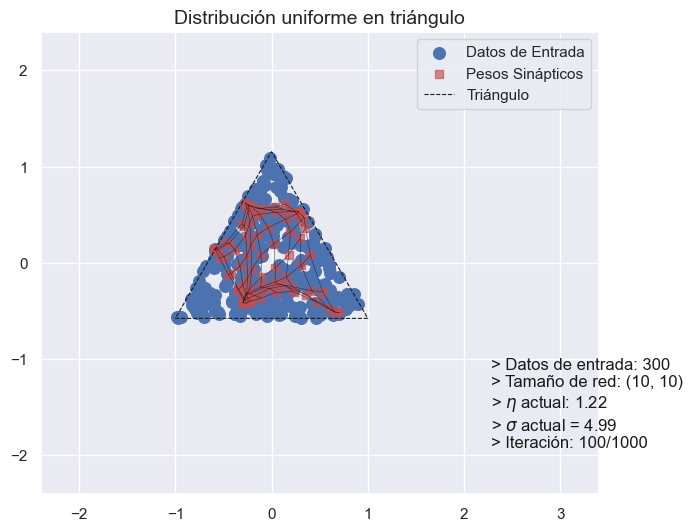

 25%|██▍       | 249/1000 [00:51<02:49,  4.42it/s]

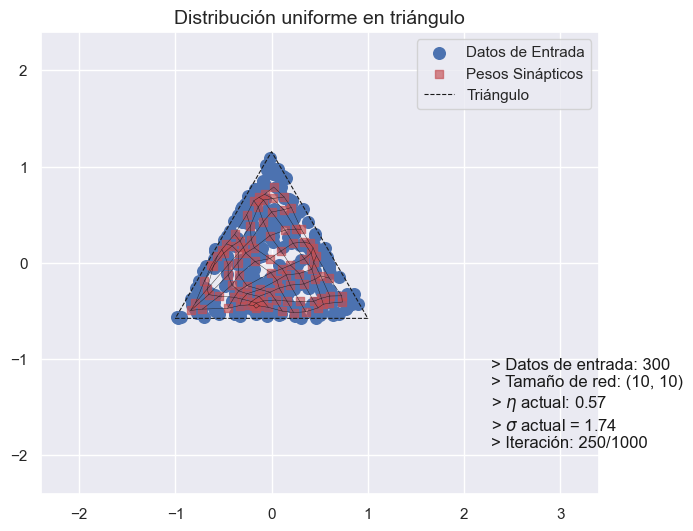

 50%|████▉     | 499/1000 [01:37<01:25,  5.85it/s]

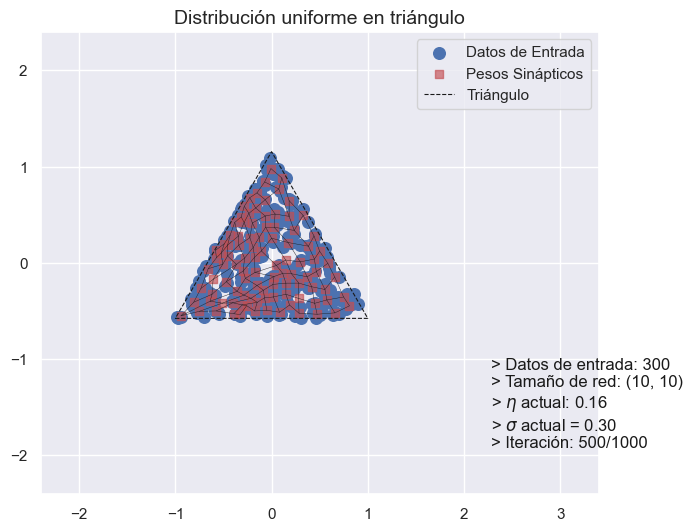

 75%|███████▍  | 749/1000 [02:25<00:44,  5.63it/s]

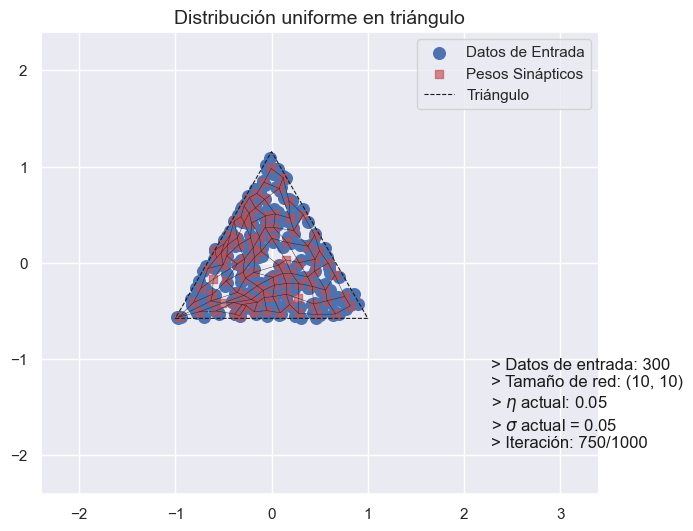

100%|█████████▉| 999/1000 [03:16<00:00,  4.45it/s]

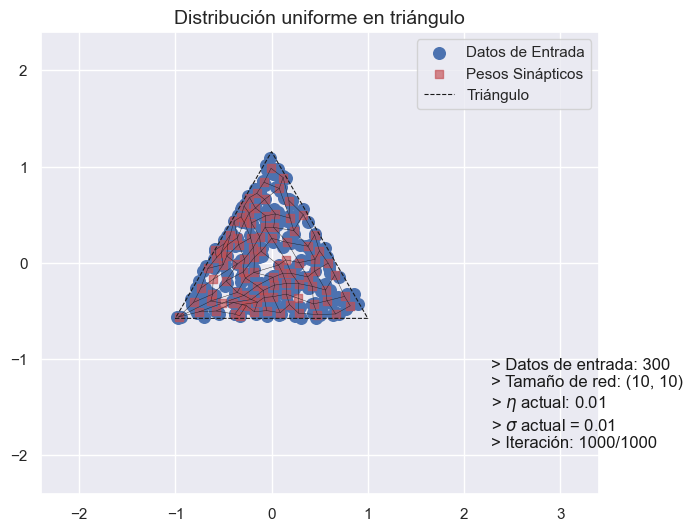

100%|██████████| 1000/1000 [03:17<00:00,  5.07it/s]


In [31]:
# Generate input data and initial weights for triangle distribution
center = (0, 0)
side_length = 2.0
X_triangle = uniformTriangleInit(gridShape[0] * gridShape[1] * 3, side_length=side_length, center=center)
W_triangle = initializeWeights((gridShape[0], gridShape[1], inputSize), scale=0.1)

# Plot parameters for triangle distribution
xLim_triangle = np.array([-1.2, 1.7]) * side_length + center
yLim_triangle = np.array([-1.2, 1.2]) * side_length + center

# Boundary for triangle distribution
triangleVertices = np.array([
    [0, 0],
    [side_length, 0],
    [side_length / 2, side_length * np.sqrt(3) / 2]
]) - [side_length / 2, side_length * np.sqrt(3) / 6]

triangleVertices = np.vstack([triangleVertices, triangleVertices[0]])
lineFmts = '--k'
lineWidths = 0.8
labels_triangle = 'Triángulo'
boundary_triangle = [(triangleVertices[:, 0], triangleVertices[:, 1], lineFmts, lineWidths, labels_triangle)]

title_triangle = 'Distribución uniforme en triángulo'
plotParameters_triangle = (None, None, boundary_triangle, xLim_triangle, yLim_triangle, title_triangle)

# Plot initial state for triangle distribution
parametersInfo_triangle = (len(X_triangle), W_triangle.shape, etaInitial, sigmaInitial, iterations, 0)
updateGraph(W_triangle, X_triangle, plotParameters_triangle, parametersInfo_triangle, 'triangle', save=True)

# Train the network for triangle distribution
W_triangle = kohonenTrain(W_triangle, X_triangle, gridShape, computeEuclideanDistances, neighborhoodFunction, plotParameters_triangle, eta=etaInitial, etaDecay=etaDecay, sigma=sigmaInitial, sigmaDecay=sigmaDecay, iterationsAmount=iterations, shape='triangle')

<>:38: SyntaxWarning: invalid escape sequence '\e'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\e'
<>:38: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Lucas\AppData\Local\Temp\ipykernel_35140\434224347.py:38: SyntaxWarning: invalid escape sequence '\e'
  > Iteración: {it}/{iterations}', color='k', size=12, transform=ax.transAxes)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_35140\434224347.py:38: SyntaxWarning: invalid escape sequence '\s'
  > Iteración: {it}/{iterations}', color='k', size=12, transform=ax.transAxes)


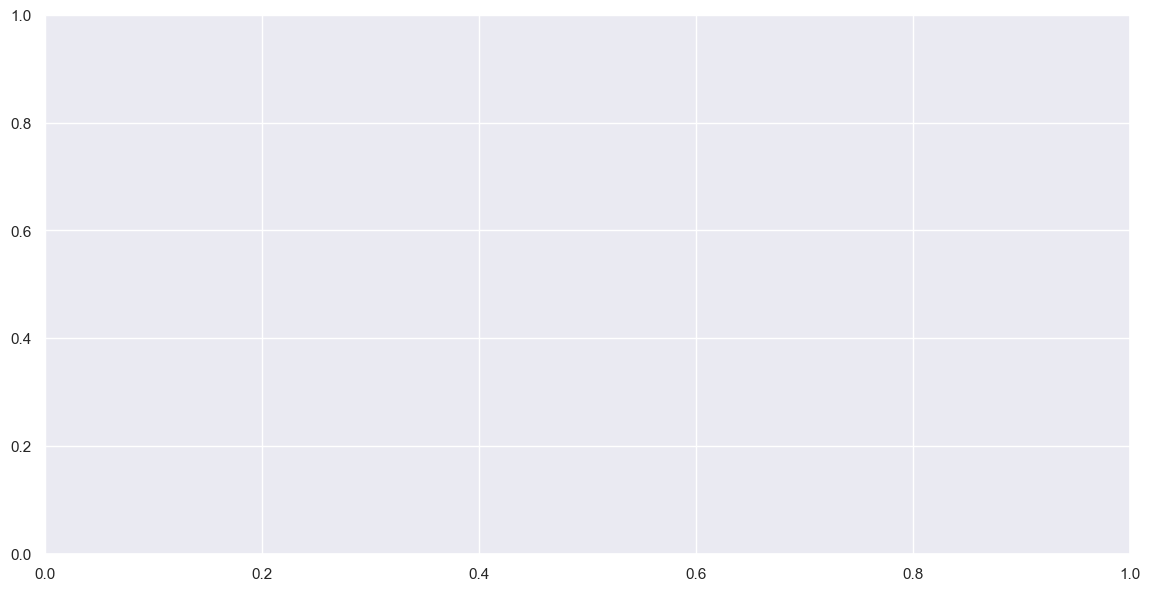

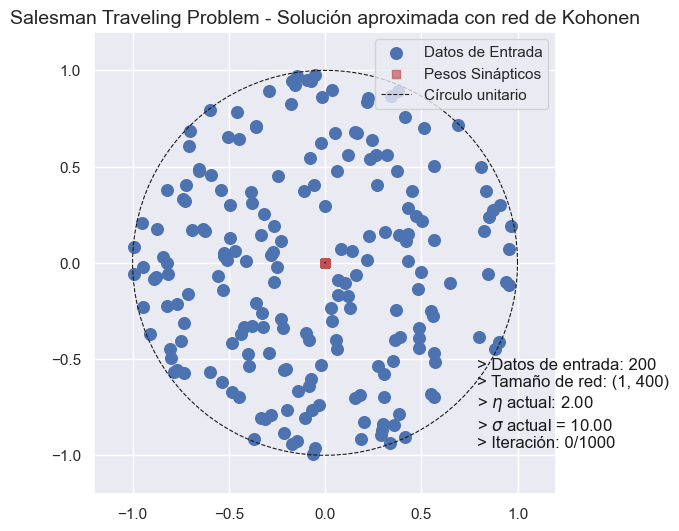

 10%|▉         | 99/1000 [01:33<13:58,  1.07it/s]

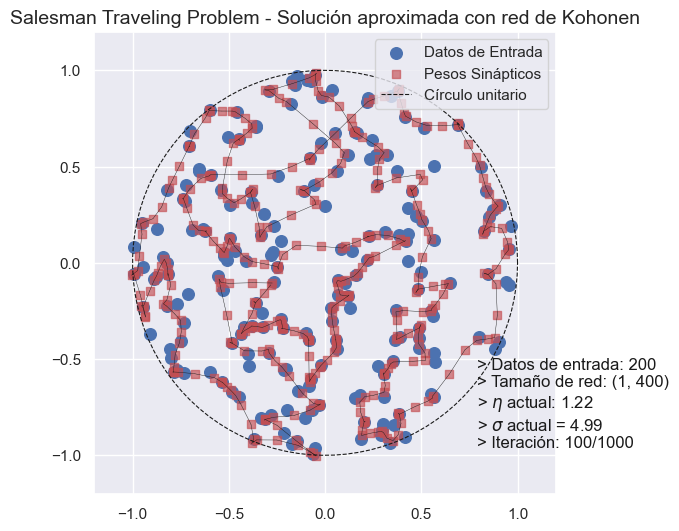

 25%|██▍       | 249/1000 [03:52<11:28,  1.09it/s]

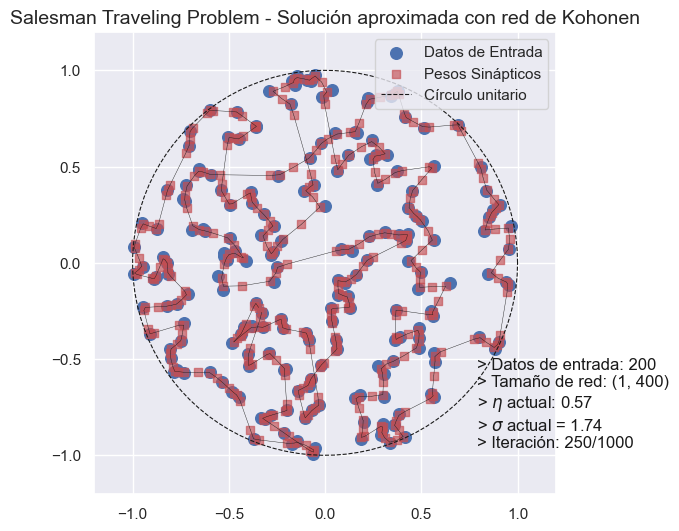

 50%|████▉     | 499/1000 [07:45<07:47,  1.07it/s]

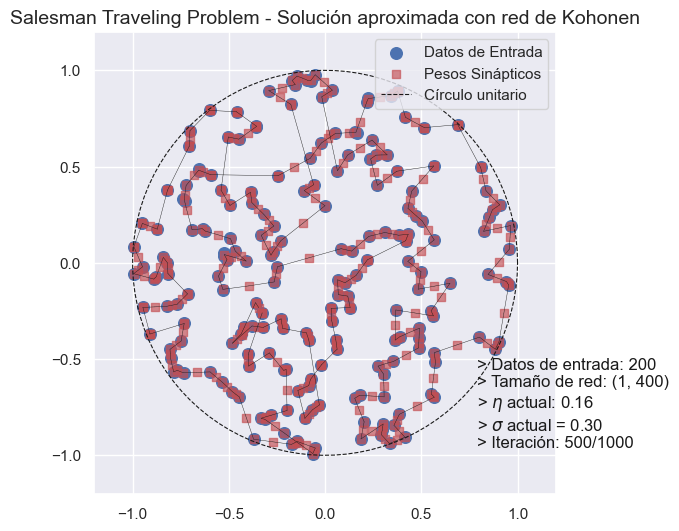

 75%|███████▍  | 749/1000 [11:38<03:49,  1.09it/s]

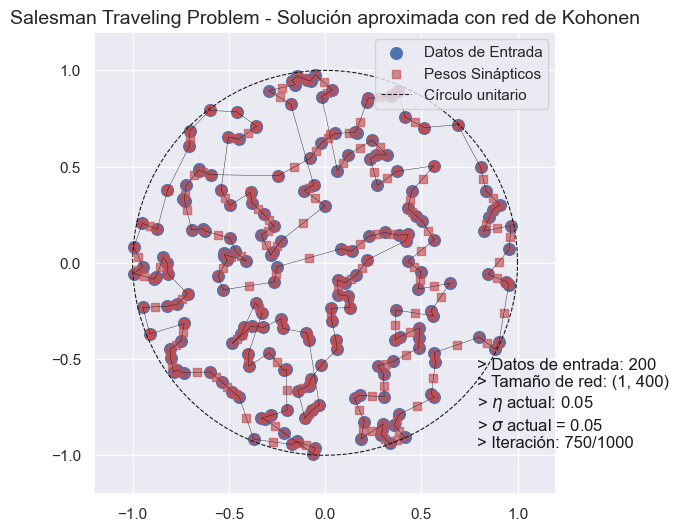

100%|█████████▉| 999/1000 [15:33<00:00,  1.07it/s]

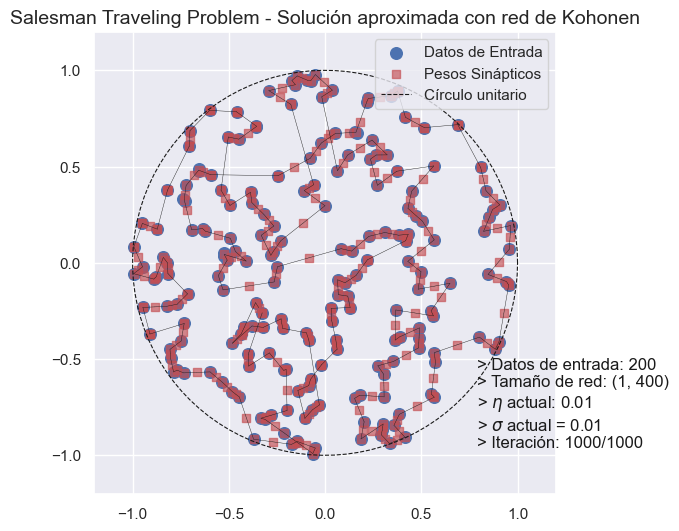

100%|██████████| 1000/1000 [15:34<00:00,  1.07it/s]


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def uniformCircleInit(N, radius=1, center=(0., 0.)):
    r = np.sqrt(np.random.uniform(0, radius, N))
    phi = np.random.uniform(0, 2 * np.pi, N)
    return np.array([r * np.cos(phi), r * np.sin(phi)]).T + center

# Definición de funciones específicas para el TSP en un círculo unitario
def uniformCirclePerimeterInit(N, radius=1, center=(0., 0.)):
    phi = np.linspace(0, 2 * np.pi, N, endpoint=False)
    return np.array([radius * np.cos(phi), radius * np.sin(phi)]).T + center

def computeCircularDistances(gridShape, winner):
    len_ = gridShape[1]
    distances = np.zeros((1, len_))
    for i in range(len_):
        distances[0][i] = np.min((np.abs(i - winner[1]), len_ - np.max((i, winner[1])) + np.min((i, winner[1]))))
    return distances

def updateGraph(W, X, plotParameters, parametersInfo, shape, save=False):
    boundaries, xLim, yLim, title = plotParameters
    inputSize, networkShape, eta, sigma, iterations, it = parametersInfo
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.grid(True)
    plotSynapticConnections(ax, W)
    ax.scatter(X[:, 0], X[:, 1], color='b', label='Datos de Entrada', s=70)
    ax.scatter(W[0, :, 0], W[0, :, 1], color='r', label='Pesos Sinápticos', marker='s', s=30, alpha=0.65)
    for boundary in boundaries:
        x, y, lineFmt, lineWidth, labelB = boundary
        ax.plot(x, y, lineFmt, linewidth=lineWidth, label=labelB)
    ax.text(0.7, 0.1, f' \n \
            > Datos de entrada: {inputSize}\n \
            > Tamaño de red: ({networkShape[0]}, {networkShape[1]})\n \
            > $\eta$ actual: {eta:.2f}\n \
            > $\sigma$ actual = {sigma:.2f}\n \
            > Iteración: {it}/{iterations}', color='k', size=12, transform=ax.transAxes)
    ax.set_title(title, fontsize=14)
    ax.set_xlim(xLim)
    ax.set_ylim(yLim)
    ax.legend(loc='upper right')
    ax.set_aspect('equal')
    plt.show()
    if save:
        fig.savefig(f'kohonen_training_{shape}_{it}.png')
    plt.pause(0.1)

# Parámetros del problema
cities_amount = 200
m = 2
N = int(cities_amount * m)
grid_shape = (1, N)
input_size = 2

# Generar datos de entrada y pesos iniciales
center = (0, 0)
radius = 1
X = uniformCircleInit(cities_amount, radius=radius, center=center)
W = np.reshape(uniformCirclePerimeterInit(N, radius=0.0001, center=center), (grid_shape[0], grid_shape[1], input_size))

# Meta-parámetros de entrenamiento
eta_initial = 2
eta_decay = 0.995
sigma_initial = 10
sigma_decay = 0.993
iterations = 1000

# Parámetros de gráfico
x_lim = np.array([-1.2, 1.2]) * radius + center
y_lim = np.array([-1.2, 1.2]) * radius + center
update_interval = 50

# Boundary:
circle_line = np.linspace(0, 2 * np.pi, 100)
line_fmts = '--k'
line_widths = 0.8
labels = 'Círculo unitario'
boundary = [(radius * np.cos(circle_line), radius * np.sin(circle_line), line_fmts, line_widths, labels)]

fig, ax = plt.subplots(figsize=(14, 7))
pause = 0
title = 'Salesman Traveling Problem - Solución aproximada con red de Kohonen'
plot_parameters = (boundary, x_lim, y_lim, title)

# Visualizar el estado inicial
parameters_info = (len(X), W.shape, eta_initial, sigma_initial, iterations, 0)
updateGraph(W, X, plot_parameters, parameters_info, 'circle', save=True)

# Entrenar la red
W = kohonenTrain(W, X, grid_shape, computeCircularDistances, neighborhoodFunction, plot_parameters, eta=eta_initial, etaDecay=eta_decay, sigma=sigma_initial, sigmaDecay=sigma_decay, iterationsAmount=iterations, shape='circle')


100%|██████████| 1000/1000 [03:04<00:00,  5.41it/s]


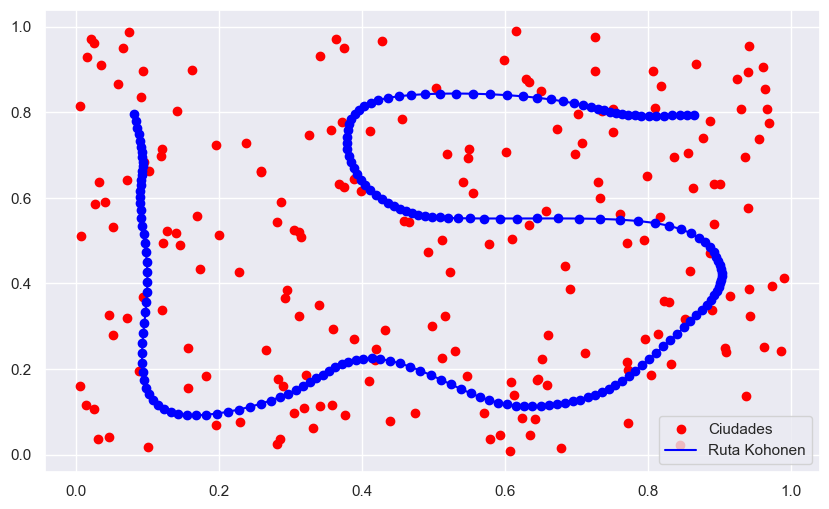

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Paso 1: Generar ciudades
def generateCities(numCities, seed=42):
    np.random.seed(seed)
    return np.random.rand(numCities, 2)

# Paso 2: Inicializar la red de Kohonen
def initializeNetwork(numNeurons, inputSize):
    return np.random.rand(numNeurons, inputSize)

# Paso 3: Funciones de distancia y vecindad
def computeDistances(W, city):
    return np.linalg.norm(W - city, axis=1)

def neighborhoodFunction(distance, sigma):
    return np.exp(-distance**2 / (2 * sigma**2))

# Paso 4: Actualizar pesos
def updateWeights(W, city, winnerIdx, sigma, learningRate):
    for i in range(W.shape[0]):
        distance = np.abs(i - winnerIdx)
        h = neighborhoodFunction(distance, sigma)
        W[i] += h * learningRate * (city - W[i])
    return W

# Paso 5: Entrenar la red
def trainNetwork(W, cities, numIterations, learningRate, sigma):
    numNeurons = W.shape[0]
    for it in tqdm(range(numIterations)):
        for city in cities:
            distances = computeDistances(W, city)
            winnerIdx = np.argmin(distances)
            W = updateWeights(W, city, winnerIdx, sigma, learningRate)
        sigma *= 0.999
        learningRate *= 0.999
    return W

# Paso 6: Visualizar la ruta
def visualizeRoute(cities, W):
    plt.figure(figsize=(10, 6))
    plt.scatter(cities[:, 0], cities[:, 1], color='red', label='Ciudades')
    plt.plot(W[:, 0], W[:, 1], color='blue', label='Ruta Kohonen')
    plt.scatter(W[:, 0], W[:, 1], color='blue')
    plt.legend()
    plt.show()

# Generar ciudades
numCities = 200
cities = generateCities(numCities)

# Inicializar la red de Kohonen
numNeurons = 200
W = initializeNetwork(numNeurons, 2)

# Entrenar la red
numIterations = 1000
learningRate = 0.8
sigma = numNeurons / 10
W = trainNetwork(W, cities, numIterations, learningRate, sigma)

# Visualizar la ruta
visualizeRoute(cities, W)
